In [1]:
from preprocessing import *

In [2]:
dir = os.path.join('calibration', 'parameters')

#err = np.load(os.path.join(dir,'err.npy'), allow_pickle=False)
K = np.load(os.path.join(dir,'K.npy'), allow_pickle=False)
#dist_coeffs = np.load(os.path.join(dir,'dist_coeffs.npy'), allow_pickle=False)
#rvecs = np.load(os.path.join(dir,'rvecs.npy'), allow_pickle=False)
#tvecs = np.load(os.path.join(dir,'tvecs.npy'), allow_pickle=False)

In [3]:
# display multiple images of a line
files = sorted(glob('./data/F6/Images/4/*.tiff', recursive=False))
label = json.load(open('./data/F6/Labels/Label4.json', 'rb'))
pose = json.load(open('./data/F6/Poses/4.json', 'rb'))

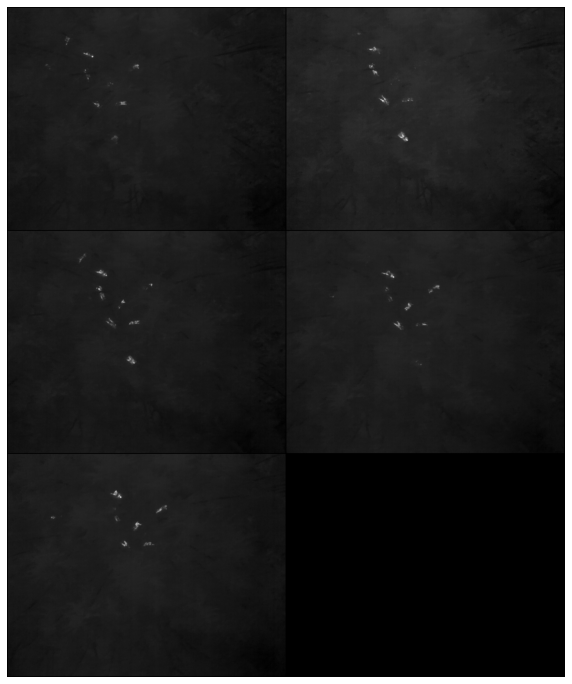

In [4]:
images = imread(files, undistort=False)
image_ids = list(range(13, 18))
show_images(images[image_ids], figsize=(10, 15))

In [5]:
M = []
for item in pose['images']:  # list of dictionaries
    M.append(np.array(item['M3x4']))
M = np.array(M)
M.shape

(29, 3, 4)

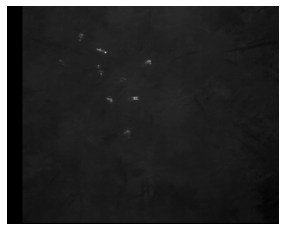

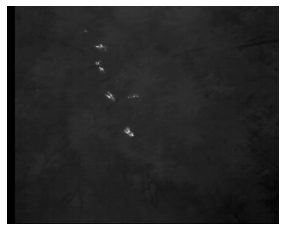

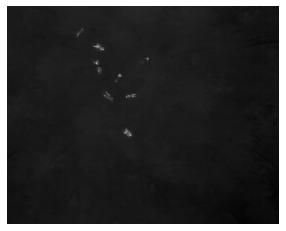

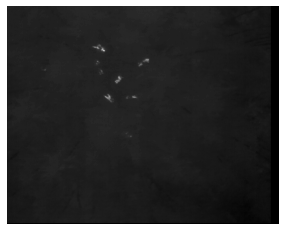

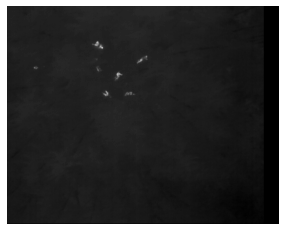

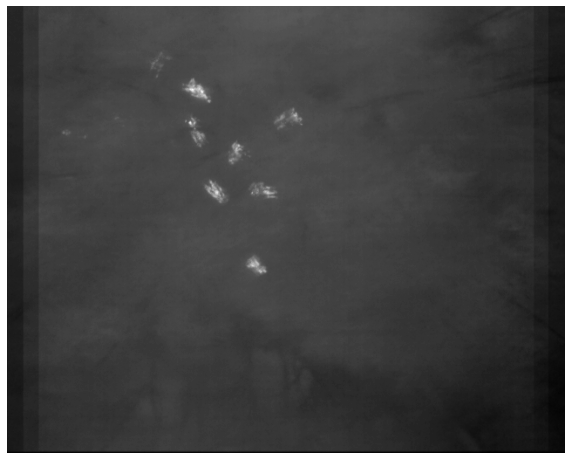

In [6]:
z = 30  # m
integral = integrate(images, image_ids, K, M, z, verbose=True)
show_image(integral, cmap='gray', figsize=(10, 15))

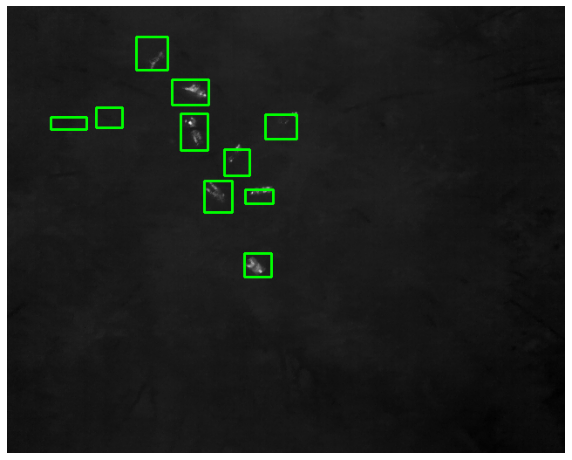

In [7]:
idx = find_file_index(files, '20191108_104942.tiff')

# extract poly annotations from json
polys = []
for item in label['Labels']:  # list of dictionaries
    polys.append(item['poly'])

# labels for the integral image shown at central image
show_image(annotate(images[idx], polys), figsize=(10, 15))

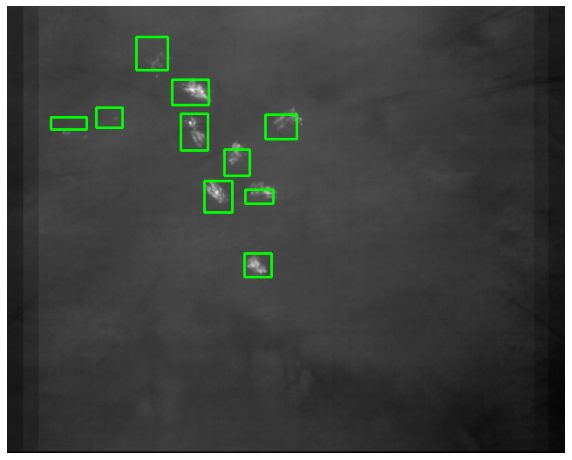

In [8]:
# integral image plus labels
show_image(annotate(integral, polys), figsize=(10, 15))

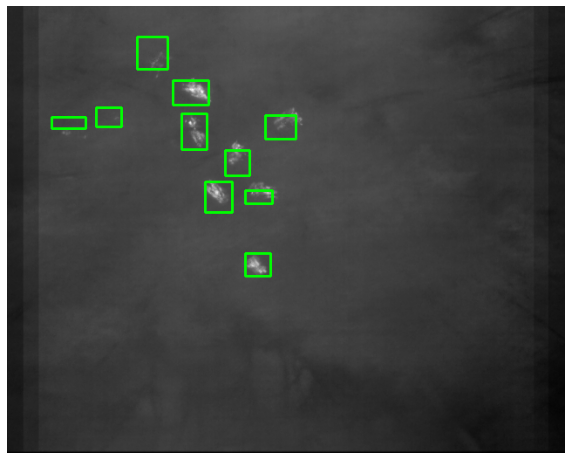

In [9]:
polys = [np.array(poly) for poly in polys]
bboxes = aabb(polys)

# here we already had AABB so nothing changed
show_image(annotate_aabb(integral, bboxes), figsize=(10, 15))

In [10]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(integral)

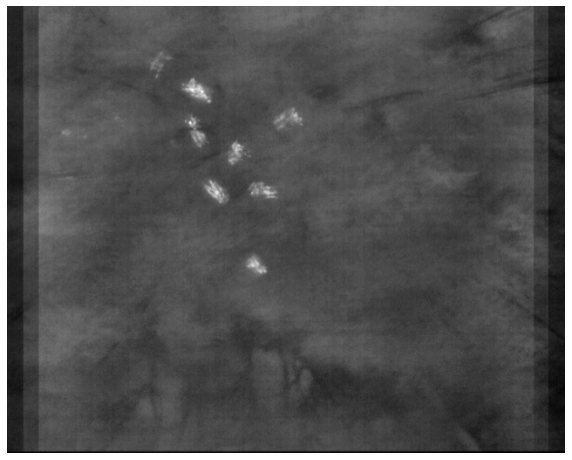

In [11]:
show_image(cl1, figsize=(10,10), cmap='gray')